In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


Uber Performance Analysis
Average Estimation Error: 0.0 minutes
Mean Absolute % Error: 5.0%
Uber is 53.6% faster than biking on average


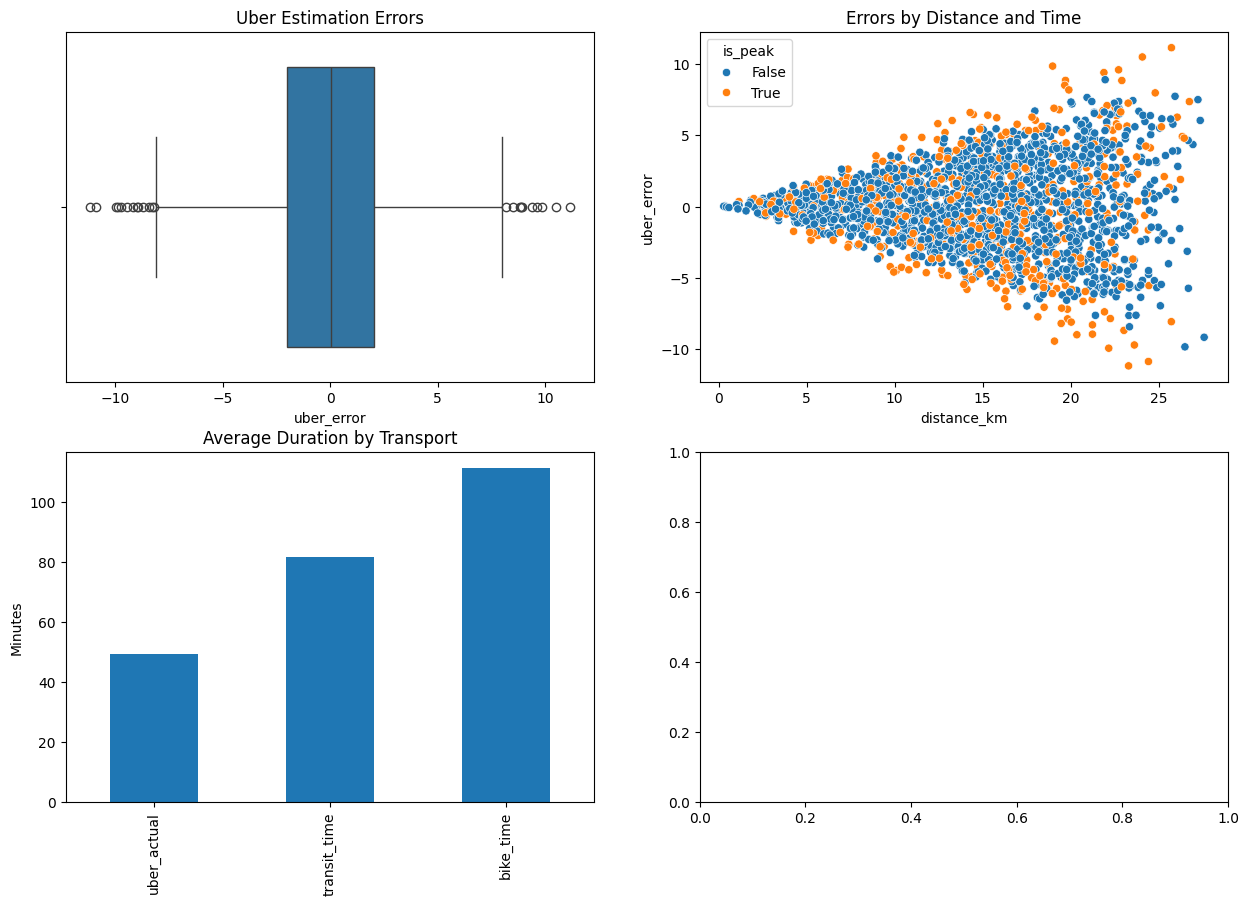

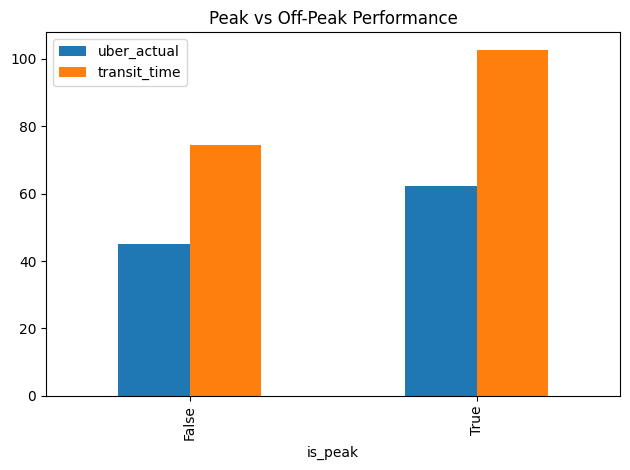


Duration Prediction Factors:
distance_km       0.792184
is_peak           0.118616
weather_factor    0.061745
hour              0.023058
is_weekend        0.004398
dtype: float64


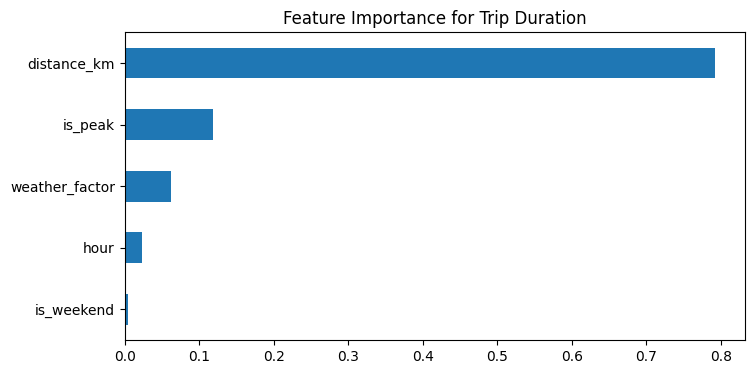

In [3]:
class UberRideAnalyzer:
    def __init__(self, num_rides=2000):
        self.rides = self.generate_ride_data(num_rides)
        self.analyze_data()

    def generate_ride_data(self, num_rides):
        # Boston coordinates
        base_lat, base_lon = 42.3601, -71.0589
        data = []

        for _ in range(num_rides):
            # Generate random start/end points
            start_lat = base_lat + np.random.uniform(-0.3, 0.3)
            start_lon = base_lon + np.random.uniform(-0.3, 0.3)
            end_lat = start_lat + np.random.uniform(-0.2, 0.2)
            end_lon = start_lon + np.random.uniform(-0.2, 0.2)

            # Calculate distance
            distance = self.haversine(start_lat, start_lon, end_lat, end_lon)

            # Time factors
            hour = np.random.randint(0, 24)
            is_weekend = np.random.random() < 0.3
            is_peak = self.is_peak_hour(hour, is_weekend)

            # Generate realistic durations
            base_speed = np.random.uniform(20, 30)
            traffic_factor = 1.5 if is_peak else 1.1
            weather_factor = np.random.choice([1.0, 1.1, 1.3])

            actual_duration = (distance / base_speed) * 60 * traffic_factor * weather_factor
            uber_estimate = actual_duration * np.random.uniform(0.9, 1.1)

            # Alternative transport estimates
            transit_time = actual_duration * np.random.uniform(1.3, 2.0)
            bike_time = actual_duration * np.random.uniform(1.5, 3.0)

            data.append({
                'distance_km': distance,
                'hour': hour,
                'is_peak': is_peak,
                'is_weekend': is_weekend,
                'weather_factor': weather_factor,
                'uber_actual': actual_duration,
                'uber_estimate': uber_estimate,
                'transit_time': transit_time,
                'bike_time': bike_time,
                'surge': np.random.choice([1.0, 1.2, 1.5, 2.0])
            })

        return pd.DataFrame(data)

    def haversine(self, lat1, lon1, lat2, lon2):
        R = 6371  # Earth radius in km
        dLat = np.radians(lat2 - lat1)
        dLon = np.radians(lon2 - lon1)
        a = (np.sin(dLat/2)**2 + np.cos(np.radians(lat1)) *
             np.cos(np.radians(lat2)) * np.sin(dLon/2)**2)
        return R * 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    def is_peak_hour(self, hour, is_weekend):
        if is_weekend:
            return 11 <= hour < 18
        return (7 <= hour < 10) or (16 <= hour < 19)

    def analyze_data(self):
        self.rides['uber_error'] = self.rides['uber_actual'] - self.rides['uber_estimate']
        self.rides['uber_error_pct'] = (self.rides['uber_error'] / self.rides['uber_actual']) * 100
        self.rides['time_savings_vs_transit'] = self.rides['transit_time'] - self.rides['uber_actual']
        self.rides['time_savings_vs_bike'] = self.rides['bike_time'] - self.rides['uber_actual']

        print("\nUber Performance Analysis")
        print("="*40)
        print(f"Average Estimation Error: {self.rides['uber_error'].mean():.1f} minutes")
        print(f"Mean Absolute % Error: {abs(self.rides['uber_error_pct']).mean():.1f}%")

        bike_savings = (1 - (self.rides['uber_actual']/self.rides['bike_time'])).mean()*100
        print(f"Uber is {bike_savings:.1f}% faster than biking on average")

        self.plot_comparisons()
        self.build_prediction_model()

    def plot_comparisons(self):
        plt.figure(figsize=(15, 10))

        plt.subplot(2, 2, 1)
        sns.boxplot(x='uber_error', data=self.rides)
        plt.title('Uber Estimation Errors')

        plt.subplot(2, 2, 2)
        sns.scatterplot(x='distance_km', y='uber_error', hue='is_peak', data=self.rides)
        plt.title('Errors by Distance and Time')

        plt.subplot(2, 2, 3)
        transport_means = self.rides[['uber_actual', 'transit_time', 'bike_time']].mean()
        transport_means.plot(kind='bar')
        plt.title('Average Duration by Transport')
        plt.ylabel('Minutes')

        plt.subplot(2, 2, 4)
        peak_comparison = self.rides.groupby('is_peak')[['uber_actual', 'transit_time']].mean()
        peak_comparison.plot(kind='bar')
        plt.title('Peak vs Off-Peak Performance')

        plt.tight_layout()
        plt.show()

    def build_prediction_model(self):
        X = self.rides[['distance_km', 'hour', 'is_peak', 'is_weekend', 'weather_factor']]
        y = self.rides['uber_actual']

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)

        importance = pd.Series(model.feature_importances_, index=X.columns)
        print("\nDuration Prediction Factors:")
        print(importance.sort_values(ascending=False))

        plt.figure(figsize=(8, 4))
        importance.sort_values().plot(kind='barh')
        plt.title('Feature Importance for Trip Duration')
        plt.show()

# Run the analysis
analyzer = UberRideAnalyzer()


=== Basic Statistics ===
Average trip distance: 15.00 km
Average trip duration: 46.4 minutes
Surge pricing frequency: 38.8%

=== Estimation Accuracy ===
Mean absolute error: 2.3 minutes
Mean percentage error: -0.0%
Estimation correlation: 0.990

=== Time Savings ===
Uber is 53.5% faster than biking
Uber is 38.5% faster than public transit

=== Peak vs Off-Peak ===
         uber_actual    surge  uber_error_pct
is_peak                                      
False      41.912666  1.14763       -0.121222
True       58.119630  1.15260        0.155688

=== Statistical Significance ===
Peak vs off-peak duration difference is significant (p=0.0000)


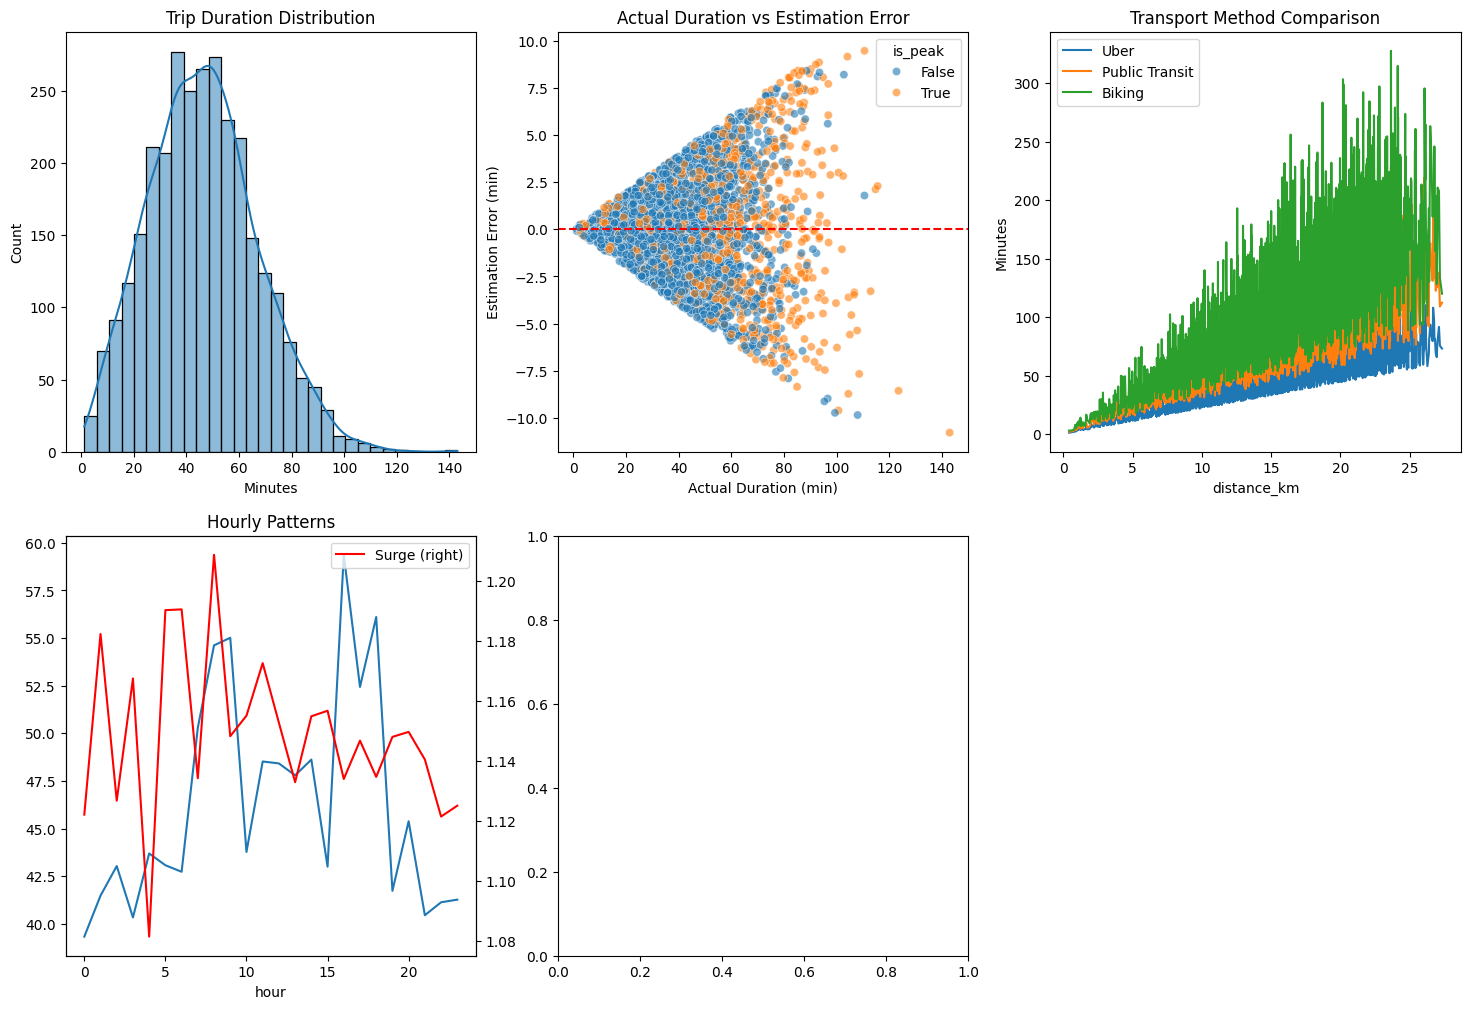

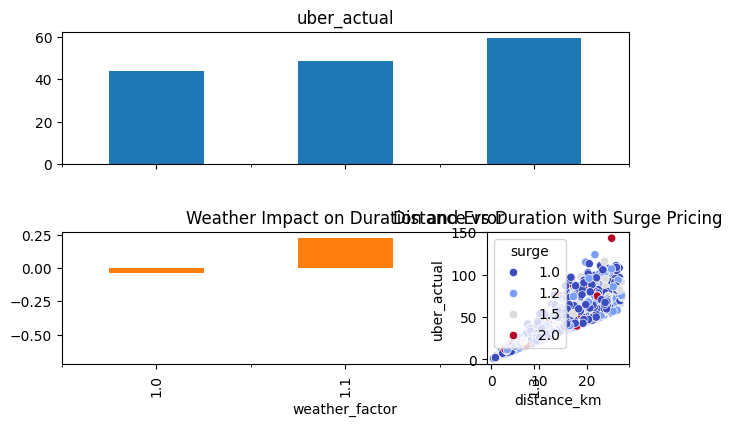


=== Duration Prediction Model ===
R-squared: 0.985
Mean Absolute Error: 1.93 minutes


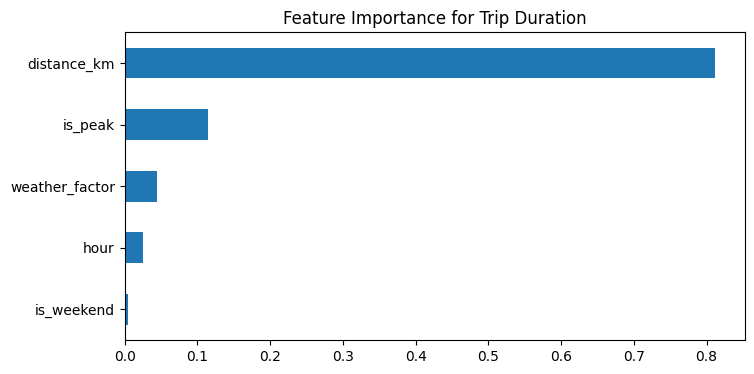

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from scipy import stats

class UberRideAnalyzer:
    def __init__(self, num_rides=2000):
        self.rides = self.generate_ride_data(num_rides)
        self.analyze_data()

    def generate_ride_data(self, num_rides):
        # Boston coordinates
        base_lat, base_lon = 42.3601, -71.0589
        data = []

        for _ in range(num_rides):
            # Generate random start/end points
            start_lat = base_lat + np.random.uniform(-0.3, 0.3)
            start_lon = base_lon + np.random.uniform(-0.3, 0.3)
            end_lat = start_lat + np.random.uniform(-0.2, 0.2)
            end_lon = start_lon + np.random.uniform(-0.2, 0.2)

            # Calculate distance
            distance = self.haversine(start_lat, start_lon, end_lat, end_lon)

            # Time factors
            hour = np.random.randint(0, 24)
            is_weekend = np.random.random() < 0.3
            is_peak = self.is_peak_hour(hour, is_weekend)

            # Generate realistic durations
            base_speed = np.random.uniform(20, 30)
            traffic_factor = 1.5 if is_peak else 1.1
            weather_factor = np.random.choice([1.0, 1.1, 1.3],
                                           p=[0.7, 0.2, 0.1])

            actual_duration = (distance / base_speed) * 60 * traffic_factor * weather_factor
            uber_estimate = actual_duration * np.random.uniform(0.9, 1.1)

            # Alternative transport estimates
            transit_time = actual_duration * np.random.uniform(1.3, 2.0)
            bike_time = actual_duration * np.random.uniform(1.5, 3.0)

            data.append({
                'distance_km': distance,
                'hour': hour,
                'is_peak': is_peak,
                'is_weekend': is_weekend,
                'weather_factor': weather_factor,
                'uber_actual': actual_duration,
                'uber_estimate': uber_estimate,
                'transit_time': transit_time,
                'bike_time': bike_time,
                'surge': np.random.choice([1.0, 1.2, 1.5, 2.0],
                                       p=[0.6, 0.25, 0.1, 0.05])
            })

        return pd.DataFrame(data)

    def haversine(self, lat1, lon1, lat2, lon2):
        R = 6371  # Earth radius in km
        dLat = np.radians(lat2 - lat1)
        dLon = np.radians(lon2 - lon1)
        a = (np.sin(dLat/2)**2 + np.cos(np.radians(lat1)) *
             np.cos(np.radians(lat2)) * np.sin(dLon/2)**2)
        return R * 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    def is_peak_hour(self, hour, is_weekend):
        if is_weekend:
            return 11 <= hour < 18
        return (7 <= hour < 10) or (16 <= hour < 19)

    def analyze_data(self):
        # Calculate metrics
        self.rides['uber_error'] = self.rides['uber_actual'] - self.rides['uber_estimate']
        self.rides['uber_error_pct'] = (self.rides['uber_error'] / self.rides['uber_actual']) * 100
        self.rides['time_savings_vs_transit'] = self.rides['transit_time'] - self.rides['uber_actual']
        self.rides['time_savings_vs_bike'] = self.rides['bike_time'] - self.rides['uber_actual']

        # Basic statistics
        print("\n=== Basic Statistics ===")
        print(f"Average trip distance: {self.rides['distance_km'].mean():.2f} km")
        print(f"Average trip duration: {self.rides['uber_actual'].mean():.1f} minutes")
        print(f"Surge pricing frequency: {(self.rides['surge'] > 1).mean()*100:.1f}%")

        # Estimation accuracy
        print("\n=== Estimation Accuracy ===")
        print(f"Mean absolute error: {abs(self.rides['uber_error']).mean():.1f} minutes")
        print(f"Mean percentage error: {self.rides['uber_error_pct'].mean():.1f}%")
        print(f"Estimation correlation: {self.rides[['uber_estimate','uber_actual']].corr().iloc[0,1]:.3f}")

        # Time savings
        bike_savings = (1 - (self.rides['uber_actual']/self.rides['bike_time'])).mean()*100
        transit_savings = (1 - (self.rides['uber_actual']/self.rides['transit_time'])).mean()*100
        print(f"\n=== Time Savings ===")
        print(f"Uber is {bike_savings:.1f}% faster than biking")
        print(f"Uber is {transit_savings:.1f}% faster than public transit")

        # Peak vs off-peak comparison
        peak_stats = self.rides.groupby('is_peak').agg({
            'uber_actual': 'mean',
            'surge': 'mean',
            'uber_error_pct': 'mean'
        })
        print("\n=== Peak vs Off-Peak ===")
        print(peak_stats)

        # Statistical tests
        print("\n=== Statistical Significance ===")
        peak = self.rides[self.rides['is_peak']]['uber_actual']
        off_peak = self.rides[~self.rides['is_peak']]['uber_actual']
        t_stat, p_value = stats.ttest_ind(peak, off_peak, equal_var=False)
        print(f"Peak vs off-peak duration difference is significant (p={p_value:.4f})")

        # Generate visualizations
        self.plot_analysis()
        self.build_prediction_model()

    def plot_analysis(self):
        plt.figure(figsize=(18, 12))

        # Duration distribution
        plt.subplot(2, 3, 1)
        sns.histplot(self.rides['uber_actual'], bins=30, kde=True)
        plt.title('Trip Duration Distribution')
        plt.xlabel('Minutes')

        # Error analysis
        plt.subplot(2, 3, 2)
        sns.scatterplot(x='uber_actual', y='uber_error',
                       hue='is_peak', data=self.rides, alpha=0.6)
        plt.axhline(0, color='red', linestyle='--')
        plt.title('Actual Duration vs Estimation Error')
        plt.xlabel('Actual Duration (min)')
        plt.ylabel('Estimation Error (min)')

        # Time savings by distance
        plt.subplot(2, 3, 3)
        sns.lineplot(x='distance_km', y='uber_actual',
                    label='Uber', data=self.rides)
        sns.lineplot(x='distance_km', y='transit_time',
                    label='Public Transit', data=self.rides)
        sns.lineplot(x='distance_km', y='bike_time',
                    label='Biking', data=self.rides)
        plt.title('Transport Method Comparison')
        plt.ylabel('Minutes')
        plt.legend()

        # Hourly patterns
        plt.subplot(2, 3, 4)
        hourly = self.rides.groupby('hour').agg({
            'uber_actual': 'mean',
            'surge': 'mean'
        })
        hourly['uber_actual'].plot(label='Duration')
        hourly['surge'].plot(secondary_y=True, color='red', label='Surge')
        plt.title('Hourly Patterns')
        plt.legend()

        # Weather impact
        plt.subplot(2, 3, 5)
        weather_impact = self.rides.groupby('weather_factor').agg({
            'uber_actual': 'mean',
            'uber_error_pct': 'mean'
        })
        weather_impact.plot(kind='bar', subplots=True, legend=False)
        plt.title('Weather Impact on Duration and Error')

        # Distance vs Duration
        plt.subplot(2, 3, 6)
        sns.scatterplot(x='distance_km', y='uber_actual',
                       hue='surge', palette='coolwarm',
                       data=self.rides)
        plt.title('Distance vs Duration with Surge Pricing')

        plt.tight_layout()
        plt.show()

    def build_prediction_model(self):
        X = self.rides[['distance_km', 'hour', 'is_peak',
                       'is_weekend', 'weather_factor']]
        y = self.rides['uber_actual']

        model = RandomForestRegressor(n_estimators=150, random_state=42)
        model.fit(X, y)

        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        mae = mean_absolute_error(y, y_pred)

        print("\n=== Duration Prediction Model ===")
        print(f"R-squared: {r2:.3f}")
        print(f"Mean Absolute Error: {mae:.2f} minutes")

        importance = pd.Series(model.feature_importances_,
                             index=X.columns).sort_values()

        plt.figure(figsize=(8, 4))
        importance.plot(kind='barh')
        plt.title('Feature Importance for Trip Duration')
        plt.show()

# Run the analysis
analyzer = UberRideAnalyzer(3000)

# New Section